In [31]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [4]:
print(os.getcwd())

c:\Users\user\Desktop\Project\MoonLight-Energy-Solutions-Data-Analytics--Week-0\src


In [81]:
data = pd.read_csv(r"c:\Users\user\Desktop\Project\MoonLight-Energy-Solutions-Data-Analytics--Week-0\data\benin-malanville.csv")

# The selected specific columns are GHI, DNI, DHI, Tamb and WS
# I tried to select row 415-425 which able me to do the analytics part.
#rw stands for Rows with Columns.

# Selected columns that are required in the tasks are: GHI, DNI, DHI, Tamb, ModA, ModB, WS, WSgust, TModA, TModB, WD, RH, BP

# Select only positive values for GHI, DNI, and DHI
#excluded_columns = ['GHI', 'DNI', 'DHI', 'Tamb']
selected_rw = data[
    (data['GHI'] > 0) &
    (data['DNI'] > 0) &
    (data['DHI'] > 0) &
    (data['Tamb'] > 0) &
    (data['ModA'] > 0) &
    (data['ModB'] > 0) &
    (data['WS'] > 0) &
    (data['WSgust'] > 0) &
    (data['TModA'] > 0) &
    (data['TModB'] > 0) &
    (data['WD'] > 0) &
    (data['RH'] > 0) &
    (data['BP'] > 0) &
    (data['Cleaning'] > 0) 
][["Timestamp", "GHI", "DNI", "DHI", "Tamb", "ModA", "ModB", "WS", "WSgust", "TModA", "TModB", "WD", "RH", "BP","Cleaning", "Comments"]]


# Randomly sample 10 positive values
selected_data = selected_rw.sample(n=10, random_state=1)  # Set random_state for reproducibility
print(selected_data)

              Timestamp    GHI    DNI    DHI  Tamb   ModA   ModB   WS  WSgust  \
252512   1/31/2022 8:33  271.1  519.6  102.4  19.5  307.7  266.8  4.0     5.1   
363380   4/18/2022 8:21  121.3    0.3  120.0  28.8  117.8  117.7  6.5     8.2   
246765   1/27/2022 8:46  284.0  436.1  126.5  19.5  320.8  288.2  3.5     4.6   
33593     9/1/2021 7:54  203.3  199.7  127.0  26.0  187.8  185.2  1.1     1.9   
419502   5/27/2022 7:43  214.0  274.1  104.6  28.2  145.6  145.4  3.1     4.1   
295711    3/2/2022 8:32  265.6  231.0  164.7  23.5  265.9  264.9  0.2     0.7   
385027    5/3/2022 9:08  449.1  226.0  305.4  31.8  400.7  400.3  4.1     5.9   
373478   4/25/2022 8:39  373.1  232.4  224.9  29.2  325.7  314.8  3.8     4.4   
333147   3/28/2022 8:28  285.5  101.2  241.3  28.6  260.8  219.2  4.1     4.9   
6668    8/13/2021 15:09  376.6    0.9  352.7  27.8  389.9  388.3  4.1     4.6   

        TModA  TModB     WD    RH   BP  Cleaning  Comments  
252512   33.7   26.0   62.6  19.3  999         

In [ ]:
# Summary Statistics
# Display descriptive statistics for the selected columns
print(selected_data.describe())

In [ ]:
# Replace negative values with NaN in the selected columns
selected_data.loc[:, ['GHI', 'DNI', 'DHI']] = selected_rw[['GHI', 'DNI', 'DHI']].mask(selected_rw[['GHI', 'DNI', 'DHI']] < 0, np.nan)

print(selected_data.head(10))

selected_data['Timestamp'] = pd.to_datetime(selected_data['Timestamp'])
selected_data.set_index('Timestamp', inplace=True)

In [ ]:
# Data Quality Check
# Check for missing values
print(selected_data.isnull().sum())

# Check data types
print(selected_data.dtypes)

missing_values = selected_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for negative values in GHI, DNI, and DHI
negative_values = selected_data[(selected_data['GHI'] < 0) | (selected_data['DNI'] < 0) | (selected_data['DHI'] < 0)]
print("Negative Values:\n", negative_values)

# Identify outliers using Z-score
from scipy import stats
z_scores = stats.zscore(selected_data[['GHI', 'DNI', 'DHI', 'Tamb']])
outliers = (abs(z_scores) > 3).any(axis=1)
print("Outliers:\n", selected_data[outliers])

# Sampling data by month
monthly_data = selected_data.resample('M').mean()  # For monthly averages
daily_data = selected_data.resample('D').mean()

# Checking Outliers
Q1 = selected_data['ModA'].quantile(0.25)
Q3 = selected_data['ModA'].quantile(0.75)
IQR = Q3 - Q1
outliers_modA = selected_data[(selected_data['ModA'] < (Q1 - 1.5 * IQR)) | (selected_data['ModA'] > (Q3 + 1.5 * IQR))]
outliers_modB = selected_data[(selected_data['ModB'] < (Q1 - 1.5 * IQR)) | (selected_data['ModB'] > (Q3 + 1.5 * IQR))]
outliers_WS = selected_data[(selected_data['WS'] < (Q1 - 1.5 * IQR)) | (selected_data['WS'] > (Q3 + 1.5 * IQR))]
outliers_WSgust = selected_data[(selected_data['WSgust'] < (Q1 - 1.5 * IQR)) | (selected_data['WSgust'] > (Q3 + 1.5 * IQR))]

In [ ]:
#Time Series Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the monthly data
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['GHI'], label='GHI', color='gold')
plt.plot(daily_data.index, daily_data['DNI'], label='DNI', color='orange')
plt.plot(daily_data.index, daily_data['DHI'], label='DHI', color='lightblue')
plt.plot(daily_data.index, daily_data['Tamb'], label='Tamb', color='red')
plt.title('Daily Averages of GHI, DNI, DHI, and Tamb Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the bar charts
monthly_data[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Averages of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the impact of cleaning

selected_data['Timestamp'] = pd.to_datetime(selected_data['Timestamp'])
daily_data = selected_data.groupby(['Cleaning', pd.Grouper(key='Timestamp', freq='D')])[['ModA', 'ModB']].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
for cleaning_status in daily_data['Cleaning'].unique():
    subset = daily_data[daily_data['Cleaning'] == cleaning_status]
    plt.plot(subset['Timestamp'], subset['ModA'], label=f'ModA - {cleaning_status}')
    plt.plot(subset['Timestamp'], subset['ModB'], label=f'ModB - {cleaning_status}', linestyle='--')
plt.title('Sensor Readings (ModA, ModB) Over Time by Cleaning Status')
plt.xlabel('Date')
plt.ylabel('Sensor Readings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis
relevant_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
data_subset = selected_data[relevant_columns]
correlation_matrix = data_subset.corr()

# Visualize Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Solar Radiation and Temperature Measures')
plt.show()

# Create Pair Plot

sns.pairplot(data_subset)
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

# Scatter Matrix for Wind Conditions

from pandas.plotting import scatter_matrix

wind_columns = ['WS', 'WSgust', 'WD']
scatter_matrix(selected_data[wind_columns + ['GHI', 'DNI', 'DHI']], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

<Figure size 800x800 with 0 Axes>

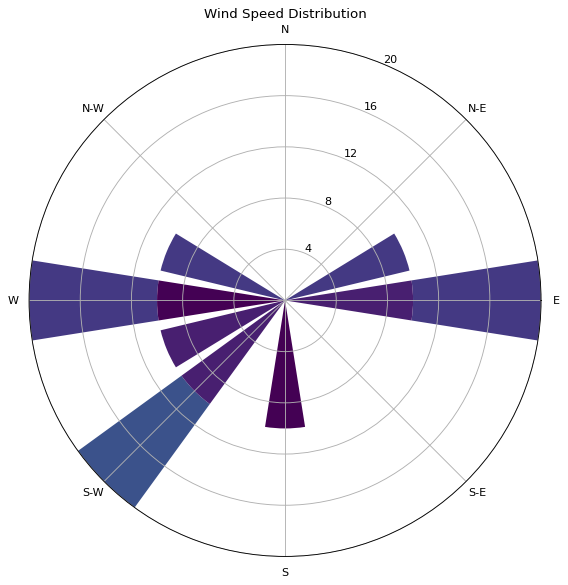

In [ ]:
# Wind Analysis

wind_data = selected_data[['WS', 'WSgust', 'WD']]

from windrose import WindroseAxes
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], bins=np.arange(0, 25, 2), normed=True)
ax.set_title ("Wind Speed Distribution")
plt.show()


In [ ]:
# Temperature Analysis

Temp_data = selected_data[['RH', 'Tamb', 'GHI', 'DNI' , 'DHI']]

# Scatter plot for RH vs. Tamb
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Temp_data, x='RH', y='Tamb', color='blue')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid()
plt.show()

# Scatter plots for RH vs. Solar Radiation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Temp_data, x='RH', y='GHI', color='gold', label='GHI')
sns.scatterplot(data=Temp_data, x='RH', y='DNI', color='orange', label='DNI')
sns.scatterplot(data=Temp_data, x='RH', y='DHI', color='lightblue', label='DHI')
plt.title('Relative Humidity vs. Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.grid()
plt.show()

# Calculate Correlation
correlation_matrix = Temp_data.corr()
print(correlation_matrix)

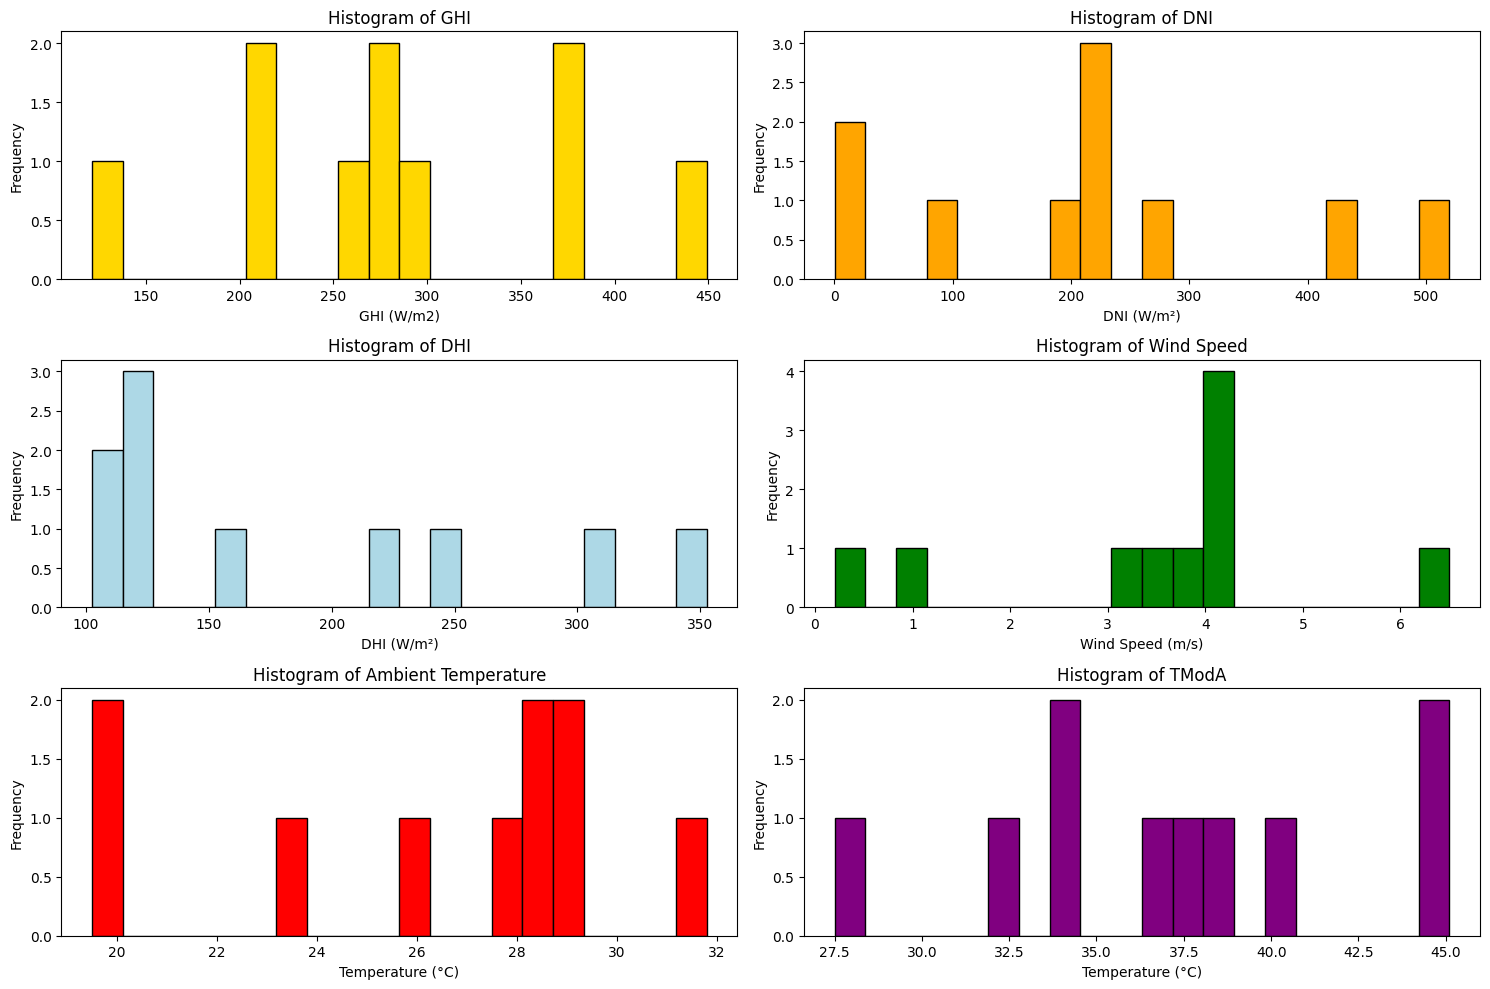

In [67]:
# Histograms
his_data = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']]

plt.figure(figsize=(15, 10))

# Histogram for GHI
plt. subplot(3, 2, 1)
plt.hist(his_data['GHI'], bins=20, color='gold', edgecolor='black')
plt.title("Histogram of GHI")
plt.xlabel('GHI (W/m2)')
plt.ylabel('Frequency')

# Histogram for DNI
plt.subplot(3, 2, 2)
plt.hist(his_data['DNI'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI
plt.subplot(3, 2, 3)
plt.hist(his_data['DHI'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for Wind Speed (WS)
plt.subplot(3, 2, 4)
plt.hist(his_data['WS'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Histogram for Ambient Temperature (Tamb)
plt.subplot(3, 2, 5)
plt.hist(his_data['Tamb'], bins=20, color='red', edgecolor='black')
plt.title('Histogram of Ambient Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for TModA
plt.subplot(3, 2, 6)
plt.hist(his_data['TModA'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of TModA')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
# Z-Score Analysis
# Select relevant columns
zdata = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']]

# Calculate mean and standard deviation
means = zdata.mean()
stds = zdata.std()

# Compute Z-scores
zScore = (zdata - means) / stds

# Define outlier threshold
outlier_threshold = 3

# Identify outliers
outliers = (zScore.abs() > outlier_threshold)

# Create a copy of the data and concatenate Z-scores
outlier_summary = pd.concat([zdata, zScore.add_suffix('_Z')], axis=1)

# Add an outlier flag
outlier_summary['Outlier'] = outliers.any(axis=1)

# Print the outlier summary
print(outlier_summary)


In [ ]:
# Bubble charts

bubble_data = selected_data[['GHI', 'Tamb', 'WS', 'RH', 'BP']]

plt.figure(figsize=(12,8))

bubble_size = bubble_data['RH'] * 10
plt.scatter(bubble_data["GHI"], bubble_data['Tamb'], s=bubble_size, alpha=0.5, c=bubble_data['WS'], cmap='viridis', edgecolors='w')

plt.title("Bubble chart: GHI vs Tam vs WS (Bubble Size = RH)")
plt.xlabel("GHI (GLobal Horizontal Irradiance)")
plt.ylabel('Tamb (Ambient Temperature)')
plt.colorbar(label='Wind Speed (WS)')

plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']]))
selected_data = selected_data[(z_scores < 3).all(axis=1)]

Q1 = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].quantile(0.25)
Q3 = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].quantile(0.75)
IQR = Q3 - Q1
selected_data = selected_data[~((selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']] < (Q1 - 1.5 * IQR)) |
           (selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']] > (Q3 + 1.5 * IQR))).any(axis=1)]
